In [62]:
import pandas as pd
import numpy as np 

In [63]:
import spacy

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
from collections import Counter

In [83]:
from nltk.corpus import stopwords

In [84]:

stopwords = stopwords.words('english')

In [68]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [69]:
Data = pd.read_csv('/home/lucky/AQS/Dataset.csv',sep = '\t')


In [70]:
Data

Topic  \
0                        Interest   
1                        Interest   
2                        Interest   
3                        Interest   
4                        Interest   
5                        Interest   
6                        Interest   
7               Time and Distance   
8                        Interest   
9               Time and Distance   
10                       Interest   
11              Time and Distance   
12                       Interest   
13              Time and Distance   
14              Time and Distance   
15                       Interest   
16              Time and Distance   
17                       Interest   
18              Time and Distance   
19                       Interest   
20              Time and Distance   
21                       Interest   
22              Time and Distance   
23                       Interest   
24              Time and Distance   
25                       Interest   
26              Time and Distance   
27                       Interest   
28              Time and Distance   
29                       Interest   
...                           ...   
1082  Permutations & Combinations   
1083  Permutations & Combinations   
1084  Permutations & Combinations   
1085  Permutations & Combinations   
1086                  Probability   
1087                  Probability   
1088                  Probability   
1089                  Probability   
1090                  Probability   
1091                  Probability   
1092                  Probability   
1093                  Probability   
1094                  Probability   
1095                  Probability   
1096                  Probability   
1097                  Probability   
1098                  Probability   
1099                  Probability   
1100                Profit & Loss   
1101                Profit & Loss   
1102                Profit & Loss   
1103                Profit & Loss   
1104                Profit & Loss   
1105                Profit & Loss   
1106                Profit & Loss   
1107                Profit & Loss   
1108                Profit & Loss   
1109                Profit & Loss   
1110         Ratios & Proportions   
1111         Ratios & Proportions   

                                               Question  
0     Find the SI for a sum of Rs.1200 at 5% pa for ...  
1     If Rs.4000 becomes Rs.4560 in 2 years time, wh...  
2     What principal would amount to Rs.8880 in 4 yr...  
3     What sum would amount to Rs.26620 in 3 years a...  
4     If a certain sum doubles itself in 3 yrs under...  
5     How many will Rs.10000 approximately amount to...  
6     A invested Rs.14000 under SI at 8% pa. Find th...  
7     A man rides his bicycle for 45 min to cover a ...  
8     A sum invested at SI amounts to Rs.6192 at the...  
9                              Express 60 kmph in m/sec  
10    A took a loan for 7 yrs at 9% pa SI. At the en...  
11    A man leaves P and reaches Q in 3 hrs at an av...  
12    Ram borrowed Rs.60000 from 2 persons under SI....  
13    A train of length 300 m travels at a speed of ...  
14    A train of length 300 m takes 20 sec to cross ...  
15    The difference between the SI and CI on a cert...  
16    In a 100 m race, ' A ' beats ' B ' by 10 m. Wh...  
17    The difference between SI at 7% pa and CI at 9...  
18    In a 1500 m race, Tinu beats Minu by 100 m. In...  
19    What is the present worth of Rs.5324 due in 3 ...  
20    A train travelled a distance of 200 km in 5 hr...  
21    If in 4 years, Rs.2520 amounts to Rs.3024, in ...  
22    A train takes 20 sec to cross a lamp post and ...  
23    A deposits Rs.50000 in PNB for 2.5 years. If t...  
24    A train travelling at 72 kmph crosses a man wa...  
25    Vivek makes a deposit of Rs.10000 in a bank fo...  
26    A bus takes 2.5 hrs more to cover a distance o...  
27    What will be the SI on Rs.700 at 9% pa for the...  
28    Mr. Khan takes 18 hours to go by train to a c

In [71]:
Data.head()

Topic                                           Question
0  Interest  Find the SI for a sum of Rs.1200 at 5% pa for ...
1  Interest  If Rs.4000 becomes Rs.4560 in 2 years time, wh...
2  Interest  What principal would amount to Rs.8880 in 4 yr...
3  Interest  What sum would amount to Rs.26620 in 3 years a...
4  Interest  If a certain sum doubles itself in 3 yrs under...

In [16]:
Data.shape


(1112, 2)

In [17]:
Data['Topic'].nunique()

10

In [44]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(Data, test_size=0.2, random_state=42)

In [45]:
print('Question sample:', train['Question'].iloc[1])
print('Topic Sample:', train['Topic'].iloc[1])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Question sample: <span style=\font-size: medium; \">The ratio of the number of pens with X and Y is 3 : 4. If X gives 4 pens to Y
Topic Sample: Ratios & Proportions
Training Data Shape: (889, 2)
Testing Data Shape: (223, 2)


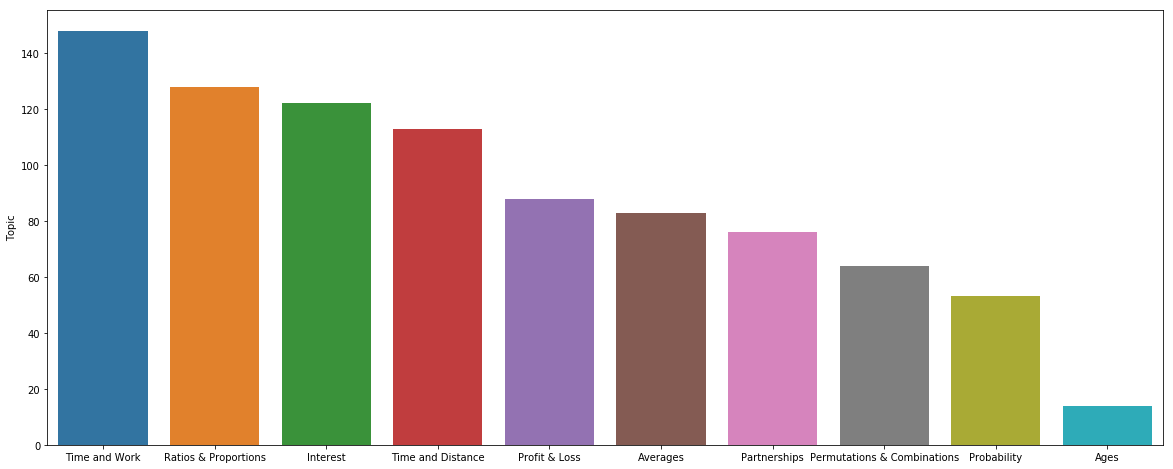

In [72]:
fig = plt.figure(figsize=(20,8))
sns.barplot(x = train['Topic'].unique(), y=train['Topic'].value_counts())
plt.show()


In [73]:
nlp = spacy.load('en_core_web_sm')

In [74]:
import string
punctuations = string.punctuation

In [75]:
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [76]:
nlp = spacy.load('en_core_web_sm')
INFO_text = [text for text in train[train['Topic'] == 'Interest']['Question']]

IS_text = [text for text in train[train['Topic'] == 'Permutations & Combinations']['Question']]

INFO_clean = cleanup_text(INFO_text)
INFO_clean = ' '.join(INFO_clean).split()

IS_clean = cleanup_text(IS_text)
IS_clean = ' '.join(IS_clean).split()

INFO_counts = Counter(INFO_clean)
IS_counts = Counter(IS_clean)

['year', 'interest', 'r', 'sum', 'rate', 'amount', 'money', 'simple', 'find', '3', '4', 'pa', 'compound', 'si', '2'] [132, 101, 94, 91, 56, 55, 37, 37, 35, 33, 32, 31, 31, 31, 29]


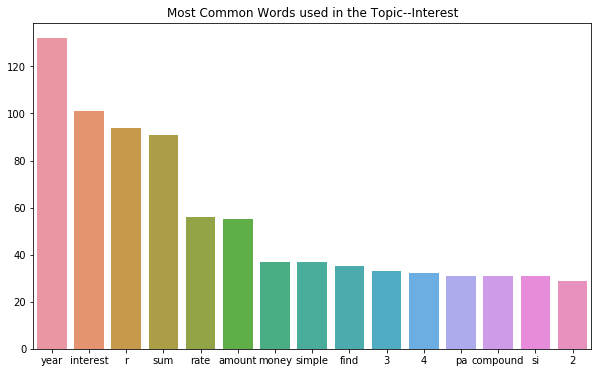

In [77]:
 x = INFO_common_words = [word[0] for word in INFO_counts.most_common(15)]
y = INFO_common_counts = [word[1] for word in INFO_counts.most_common(15)]
print(x,y)
fig = plt.figure(figsize=(10,6))
sns.barplot(x=INFO_common_words, y=INFO_common_counts)
plt.title('Most Common Words used in the Topic--Interest')
plt.show()

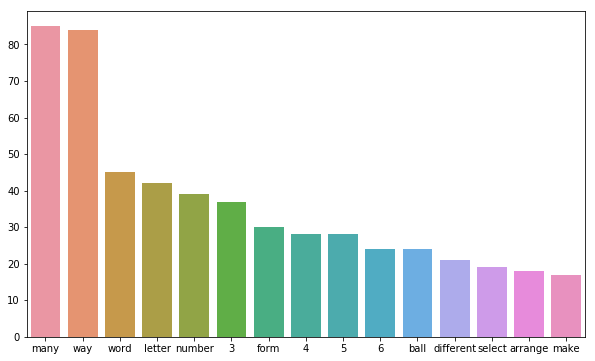

In [78]:


IS_common_words = [word[0] for word in IS_counts.most_common(15)]
IS_common_counts = [word[1] for word in IS_counts.most_common(15)]

fig = plt.figure(figsize=(10,6))
sns.barplot(x=IS_common_words, y=IS_common_counts)
plt.title('')
plt.show()

In [79]:
test.head()

Topic                                           Question
436         Time and Work  A is faster than B. A and B walk 24 km. The su...
539  Ratios & Proportions  <span style=\font-size: medium; \">The earning...
56      Time and Distance  It takes 12 hrs for man to cover 35 km downstr...
695           Probability  Two dice are rolled together. Find the probabi...
722              Averages  A company employs only couples. While the husb...

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score

spacy.load('en')
from spacy.lang.en import English
parser = English()

In [86]:
STOPLIST = set(stopwords.words('english')+ list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

AttributeError: 'list' object has no attribute 'words'

In [87]:
class CleanTextTransformer(TransformerMixin):
    def transform(self, X,):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, ):
        return self
    def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [88]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)

In [89]:
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
clf = LinearSVC()
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])

# data
train1 = train['Question'].tolist()
labelsTrain1 = train['Topic'].tolist()

test1 = test['Question'].tolist()
labelsTest1 = test['Topic'].tolist()
# train
pipe.fit(train1, labelsTrain1)

# test
preds = pipe.predict(test1)
print("accuracy:", accuracy_score(labelsTest1, preds))
print("Top 10 features used to predict: ")

printNMostInformative(vectorizer, clf, 10)

pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
transform = pipe.fit_transform(train1, labelsTrain1)
vocab = vectorizer.get_feature_names()

for i in range(len(train1)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
    numOfccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOfccurences):
        s += str((vocab[idx], num))

NameError: name 'STOPLIST' is not defined

In [90]:
from sklearn import metrics
print(metrics.classification_report(labelsTest1, preds,))

NameError: name 'preds' is not defined